In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Iterable

In [28]:
dataframe = pd.read_csv('data/games.csv',encoding='utf-8-sig', index_col=0)
dataframe.columns = dataframe.columns.str.strip()
print(dataframe)

                           Name  Release date Estimated owners  Peak CCU  \
AppID                                                                      
20200          Galactic Bowling  Oct 21, 2008        0 - 20000         0   
655370             Train Bandit  Oct 12, 2017        0 - 20000         0   
1732930            Jolt Project  Nov 17, 2021        0 - 20000         0   
1355720                Henosis™  Jul 23, 2020        0 - 20000         0   
1139950   Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   
...                         ...           ...              ...       ...   
3080940  Femdom Game World: Mom  Aug 22, 2024        0 - 20000         0   
2593970             Blocky Farm  Aug 30, 2024            0 - 0         0   
3137150    Infiltrate & Extract  Aug 30, 2024            0 - 0         0   
3124670       Escape The Garage  Aug 29, 2024            0 - 0         0   
3054200              Lober Lobe  Aug 30, 2024            0 - 0         0   

         Re

In [29]:
filtered_games_df = dataframe[dataframe['Peak CCU'] >= 2].copy()

In [30]:
filtered_games_df['Genres'] = filtered_games_df['Genres'].str.split(',')
exploded_genres_df = filtered_games_df.explode('Genres')

In [31]:
genre_ccu_avg = exploded_genres_df.groupby('Genres')['Peak CCU'].mean().sort_values(ascending=False)

In [32]:
print("Top Genres by Average Peak Concurrent Users (CCU):")
print(genre_ccu_avg.head(20))

Top Genres by Average Peak Concurrent Users (CCU):
Genres
SteamVR Collectibles          22529.080000
HDR available                 18636.000000
Valve Anti-Cheat enabled      17980.118182
In-App Purchases               5937.822967
Remote Play on Tablet          4637.836986
Remote Play on Phone           4240.968310
Online Co-op                   3713.706821
Steam Workshop                 3163.184615
Co-op                          2893.240240
MMO                            2791.297674
Includes Source SDK            2317.500000
LAN Co-op                      2219.245192
Multi-player                   2159.129567
Commentary available           2043.912500
Captions available             2042.111979
Cross-Platform Multiplayer     1993.025434
Online PvP                     1976.129136
Stats                          1957.485261
LAN PvP                        1931.911215
Full controller support        1907.288143
Name: Peak CCU, dtype: float64


In [33]:
filtered_games_df['Tags'] = dataframe['Tags'].str.split(',')
exploded_tags_df = filtered_games_df.explode('Tags')
tags_ccu_avg = exploded_tags_df.groupby('Tags')['Peak CCU'].mean().sort_values(ascending=False)
print("Top Tags by Average Peak Concurrent Users (CCU):")
print(tags_ccu_avg.head(25))

Top Tags by Average Peak Concurrent Users (CCU):
Tags
Free to Play             2867.963822
Photo Editing            2594.176471
Massively Multiplayer    2499.504026
Action                   1859.660282
RPG                      1498.692342
Early Access             1475.566092
Adventure                1234.103164
Sports                    952.129751
Animation & Modeling      898.748031
Design & Illustration     709.796053
Simulation                677.259938
Strategy                  621.961440
Utilities                 581.627193
Indie                     469.844436
Racing                    362.993080
Audio Production          333.696429
Video Production          272.278481
Casual                    189.113166
Education                 170.384615
Web Publishing            152.511111
Software Training         148.652174
Game Development           72.305085
Movie                      12.000000
Nudity                     11.777778
Violent                    10.718750
Name: Peak CCU, dtype

In [34]:
filtered_games_df['Categories'] = dataframe['Categories'].str.split(',')
exploded_categories_df = filtered_games_df.explode('Categories')
categories_ccu_avg = exploded_categories_df.groupby('Categories')['Peak CCU'].mean().sort_values(ascending=False)
print("Top Categories by Average Peak Concurrent Users (CCU):")
print(categories_ccu_avg.head(20))

Top Categories by Average Peak Concurrent Users (CCU):
Categories
Game Science              607320.500000
Newnight                  405191.000000
Pocketpair                321390.750000
Amazon Games              152094.500000
KRAFTON                    95974.000000
Keen Games GmbH            89612.000000
Wallpaper Engine Team      85643.000000
Bungie                     72573.000000
Warner Bros. Games         69372.928571
FromSoftware Inc.          66141.500000
 a.s.                      63613.000000
MADFINGER Games            63613.000000
NetEase Games Montréal     61338.000000
CE-Asia(Asia)              59368.000000
Zeekerss                   56373.666667
Smartly Dressed Games      54184.000000
Landfall Publishing        53471.000000
Valve                      47286.970588
Studio Wildcard            46038.333333
SEGA Europe                41798.000000
Name: Peak CCU, dtype: float64


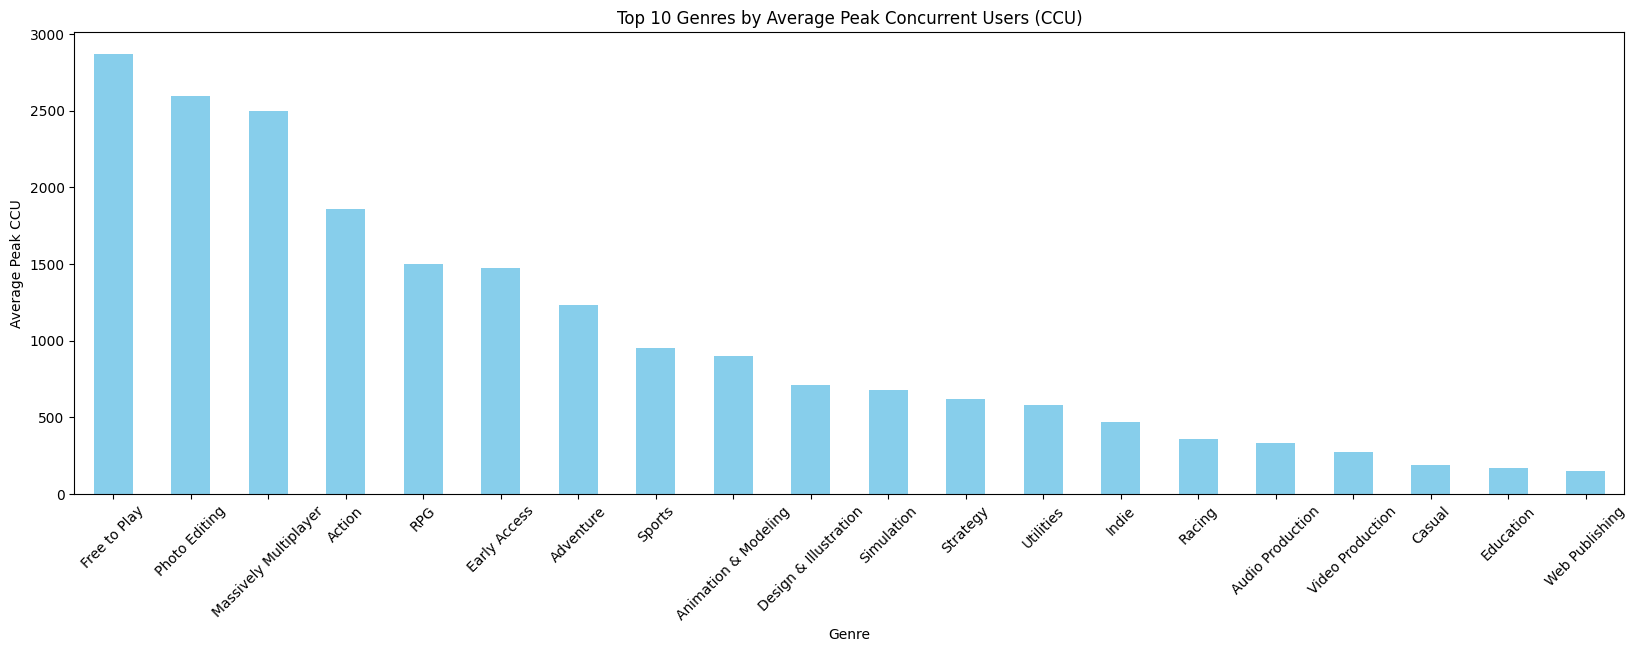

In [35]:
plt.figure(figsize=(20, 6))
tags_ccu_avg.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres by Average Peak Concurrent Users (CCU)")
plt.xlabel("Genre")
plt.ylabel("Average Peak CCU")
plt.xticks(rotation=45)
plt.show()

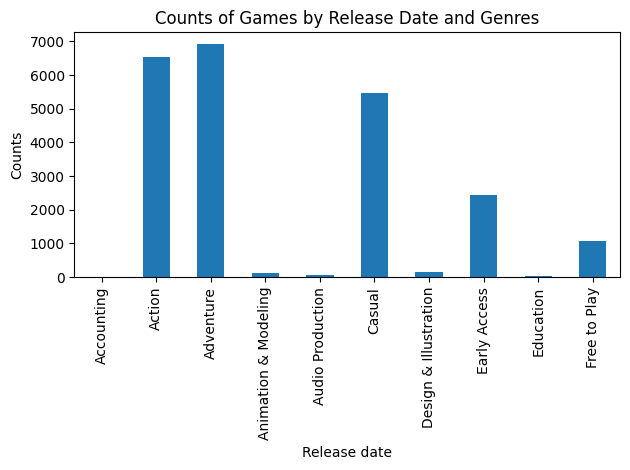

In [37]:
exploded_tags_df["Release date"] = pd.to_datetime(exploded_tags_df['Release date'], format='mixed').dt.year
grouped = exploded_tags_df.groupby(['Release date', 'Tags']).size()
grouped = grouped.reset_index(name='counts')

grouped = grouped.nlargest(10, 'Release date')
for release_year in grouped['Release date'].unique():
    temp_df = grouped[grouped['Release date'] == release_year]
    temp_df.plot(kind='bar', x='Tags', y='counts', legend=False, title=f"Year: {release_year}")


plt.xlabel('Release date')
plt.ylabel('Counts')
plt.title('Counts of Games by Release Date and Genres')
plt.tight_layout()
plt.show()
